In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='whitegrid',palette=sns.color_palette("husl", 11), font_scale=3.)

In [33]:
variants_df = pd.read_csv('../data/transformed_lineages.csv',header=0)
variants_df['total_sequences'] = variants_df.iloc[:,1:-1].sum(axis=1)

In [34]:
for col in list(variants_df):
    if col != 'week' and col != 'total_sequences':
        col_name = 'proportion_' + col
        variants_df[col_name] = variants_df[col] / variants_df['total_sequences']
variants_df.head(20)
variants_df.fillna(0, inplace=True)

In [35]:
proportion_cols = [c for c in variants_df.columns.values if 'proportion' in c]
max_proportion_per_variant = variants_df[proportion_cols].max(axis=0).to_dict()
proportion_cols_to_keep = [c for c in proportion_cols if max_proportion_per_variant[c] >= 0.1]

variants_df = variants_df[['week']+proportion_cols_to_keep]

In [36]:
tests_df = pd.read_csv('../data/percent_positivities.csv', header=0)
percent_positivity = tests_df[['rate(positive_test)', 'week']]

In [37]:
combined_df = variants_df.merge(percent_positivity, on='week')
proportion_variants_cols = [c for c in combined_df.columns.values if 'proportion' in c] 

In [38]:
combined_df.tail(10)

,week,proportion_BA.2.12.1,proportion_BA.5,proportion_BA.4,proportion_BA.2.3,proportion_BA.2,proportion_BA.2.9,proportion_BA.1.1,proportion_BA.1,proportion_BA.1.15,rate(positive_test)
15,16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.039163
16,17,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0.0,0.0,0.052517
17,18,0.325581,0.011628,0.011628,0.127907,0.343023,0.052326,0.005814,0.0,0.0,0.060185
18,19,0.364078,0.019417,0.033981,0.077670,0.368932,0.053398,0.000000,0.0,0.0,0.069480
19,20,0.543624,0.006711,0.006711,0.033557,0.275168,0.053691,0.000000,0.0,0.0,0.087817
20,21,0.650000,0.016667,0.000000,0.041667,0.141667,0.041667,0.000000,0.0,0.0,0.101121
21,22,0.645161,0.064516,0.064516,0.000000,0.129032,0.032258,0.000000,0.0,0.0,0.114922
22,23,0.533333,0.166667,0.091667,0.008333,0.100000,0.016667,0.000000,0.0,0.0,0.127855
23,24,0.460526,0.263158,0.092105,0.019737,0.072368,0.013158,0.000000,0.0,0.0,0.128550
24,25,0.355140,0.327103,0.214953,0.009346,0.037383,0.009346,0.000000,0.0,0.0,0.138264


In [39]:
positive_variant_frac_df = combined_df[proportion_variants_cols].apply(lambda x: x*combined_df['rate(positive_test)'])
positive_variant_frac_df['week'] = combined_df['week']

In [40]:
week = positive_variant_frac_df['week']
variants_dict = {}
for col in list(positive_variant_frac_df):
    if 'proportion' in col:
        variants_dict[col] = positive_variant_frac_df[col].tolist()

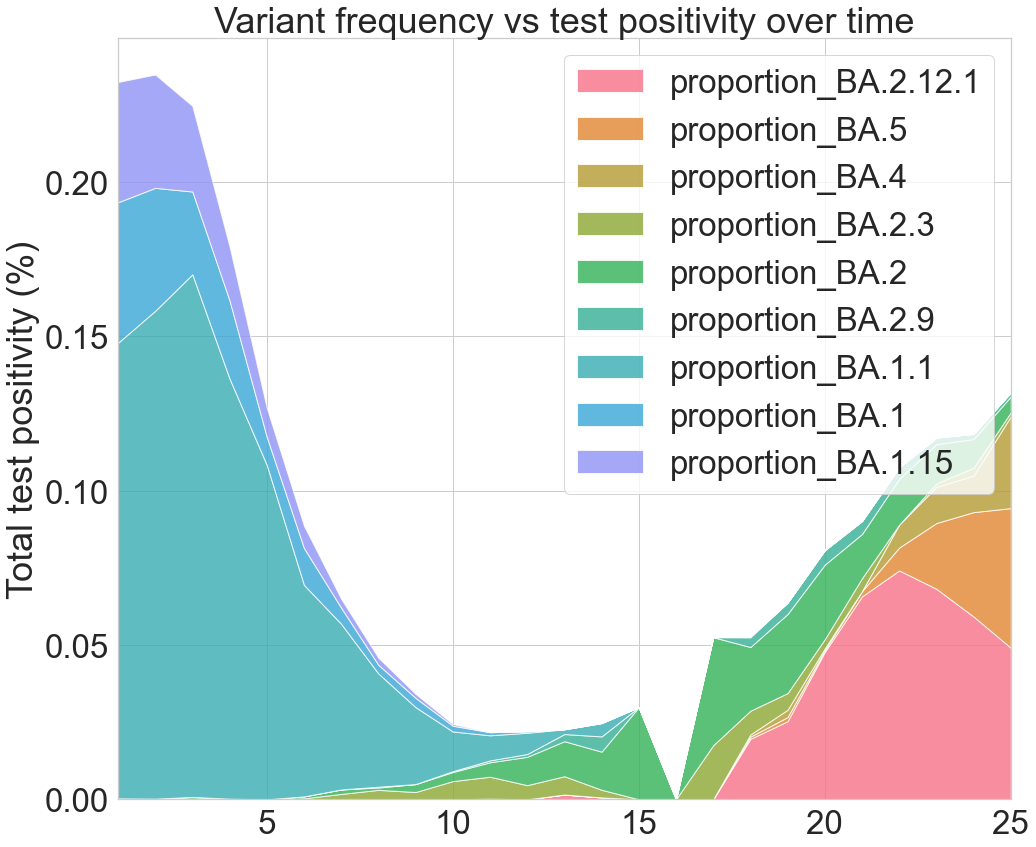

In [43]:
fig, ax = plt.subplots(figsize=(16,14))
## feed in binned dates (weekly) in place of 'year'
ax.stackplot(week, variants_dict.values(),
             labels=variants_dict.keys(), alpha=0.8)
ax.legend(loc='upper right')
ax.set_title('')
ax.set_ylabel('Total test positivity (%)')
ax.set_xlabel('Week number (2022)')


ax.set_xlim(1, 25)
plt.savefig('./variantFreqTestPos.png')